<a href="https://colab.research.google.com/github/Zlmknc/ML-CKD/blob/main/ckd_DataStand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Veri Seti Standardizasyonu(Normalleştirme)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

print("🔽 Veri seti yükleniyor...")
df = pd.read_csv("/content/kidney_disease.csv")
print(f"✅ Veri seti boyutu: {df.shape}\n")

print("🔎 İlk 5 satır:")
print(df.head(), "\n")

print("📊 Veri seti hakkında bilgi:")
print(df.info(), "\n")

🔽 Veri seti yükleniyor...
✅ Veri seti boyutu: (400, 26)

🔎 İlk 5 satır:
   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns

In [3]:
##Standardizasyon İşlemleri(Veri Normalleştirme)

# id sütununu kaldırma
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
    print("🗑️ 'id' sütunu kaldırıldı.\n")

# classification sütunu: hedef değişken (ckd -> 1, notckd -> 0)
print("🎯 Hedef sütun 'classification' düzenleniyor...")
df['classification'] = df['classification'].astype(str).str.strip().replace({'ckd\t': 'ckd', 'notckd': 'notckd'})
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})
print("✅ 'classification' sütunu sayısal değerlere dönüştürüldü.\n")


# Kategorik ve sayısal sütunları ayırma
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()
numerical_cols.remove('classification')  # hedefi sayısal sütunlardan çıkar

print(f"📊 Kategorik sütunlar ({len(categorical_cols)}): {categorical_cols}")
print(f"🔢 Sayısal sütunlar ({len(numerical_cols)}): {numerical_cols}\n")

🗑️ 'id' sütunu kaldırıldı.

🎯 Hedef sütun 'classification' düzenleniyor...
✅ 'classification' sütunu sayısal değerlere dönüştürüldü.

📊 Kategorik sütunlar (13): ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
🔢 Sayısal sütunlar (11): ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']



In [4]:
# Eksik değer sayısı (ilk durum)
print("📉 Eksik değer sayıları (ilk durum):")
print(df.isnull().sum(), "\n")


##Eksik değerlerde;

# 1.Kategorik değerleri en sık (mode) ile doldur
print("🔧 Kategorik eksik veriler dolduruluyor (mode)...")
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
print("✅ Kategorik eksik veriler tamamlandı.\n")

# 2.Sayısal değerleri ortalama ile doldur
print("🔧 Sayısal eksik veriler dolduruluyor (mean)...")
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
print("✅ Sayısal eksik veriler tamamlandı.\n")


# Eksik değer sayısı (son durum)
print("📉 Eksik değer sayıları (temizlendikten sonra):")
print(df.isnull().sum(), "\n")

📉 Eksik değer sayıları (ilk durum):
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64 

🔧 Kategorik eksik veriler dolduruluyor (mode)...
✅ Kategorik eksik veriler tamamlandı.

🔧 Sayısal eksik veriler dolduruluyor (mean)...
✅ Sayısal eksik veriler tamamlandı.

📉 Eksik değer sayıları (temizlendikten sonra):
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0


In [5]:
# Kategorik sütunları sayısallaştırma
print("🔢 Kategorik sütunlar sayısallaştırılıyor (Label Encoding)...")
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"🔁 '{col}' sütunu dönüştürüldü.")
print("✅ Tüm kategorik sütunlar sayısallaştırıldı.\n")

# Özellikler ve hedef değişkeni ayır
X = df.drop('classification', axis=1)
y = df['classification']
print(f"🧠 Özellik matrisi boyutu: {X.shape}")
print(f"🎯 Hedef vektör boyutu: {y.shape}\n")

# Veriyi ölçeklendir
print("📏 Özellikler StandardScaler ile ölçeklendiriliyor...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Veriler standardize edildi.\n")

🔢 Kategorik sütunlar sayısallaştırılıyor (Label Encoding)...
🔁 'rbc' sütunu dönüştürüldü.
🔁 'pc' sütunu dönüştürüldü.
🔁 'pcc' sütunu dönüştürüldü.
🔁 'ba' sütunu dönüştürüldü.
🔁 'pcv' sütunu dönüştürüldü.
🔁 'wc' sütunu dönüştürüldü.
🔁 'rc' sütunu dönüştürüldü.
🔁 'htn' sütunu dönüştürüldü.
🔁 'dm' sütunu dönüştürüldü.
🔁 'cad' sütunu dönüştürüldü.
🔁 'appet' sütunu dönüştürüldü.
🔁 'pe' sütunu dönüştürüldü.
🔁 'ane' sütunu dönüştürüldü.
✅ Tüm kategorik sütunlar sayısallaştırıldı.

🧠 Özellik matrisi boyutu: (400, 24)
🎯 Hedef vektör boyutu: (400,)

📏 Özellikler StandardScaler ile ölçeklendiriliyor...
✅ Veriler standardize edildi.



In [23]:
# Final bilgi
print("🎉 Veri seti modellemeye hazır hale getirildi.")
print(f"🔎 Nihai öznitelik matrisi boyutu: {X_scaled.shape}")

# Hedef sütun kontrolü
target_col = 'classification'
if target_col in df.columns:
    print(f"🎯 Hedef sütun: {target_col}\n")
else:
    raise ValueError(f"Hedef sütun '{target_col}' veri kümesinde bulunamadı.")

🎉 Veri seti modellemeye hazır hale getirildi.
🔎 Nihai öznitelik matrisi boyutu: (400, 24)
🎯 Hedef sütun: classification



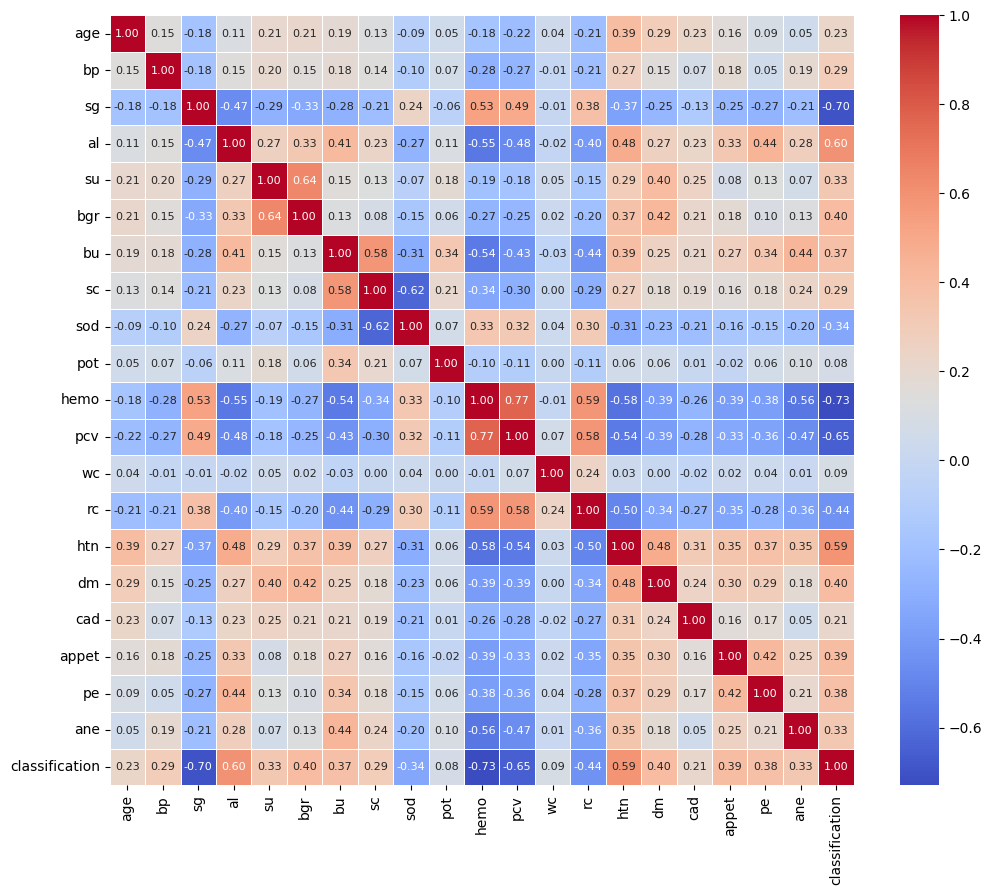

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Korelasyon Matrisini Isı Haritası
plt.figure(figsize=(12, 10)) # Daha büyük figür boyutu, daha fazla öznitelik için
sns.heatmap(correlation_matrix_important, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.show()

Aykırı değer tespiti

🔽 Aykırı değerler tespit ediliyor...
  - 'age' sütununda 10 aykırı değer bulundu.
  - 'bp' sütununda 36 aykırı değer bulundu.
  - 'sg' sütununda 7 aykırı değer bulundu.
  - 'al' sütununda aykırı değer bulunamadı.
  - 'su' sütununda 48 aykırı değer bulundu.
  - 'rbc' sütununda 47 aykırı değer bulundu.
  - 'pc' sütununda 76 aykırı değer bulundu.
  - 'pcc' sütununda 42 aykırı değer bulundu.
  - 'ba' sütununda 22 aykırı değer bulundu.
  - 'bgr' sütununda 53 aykırı değer bulundu.
  - 'bu' sütununda 41 aykırı değer bulundu.
  - 'sc' sütununda 44 aykırı değer bulundu.
  - 'sod' sütununda 18 aykırı değer bulundu.
  - 'pot' sütununda 14 aykırı değer bulundu.
  - 'hemo' sütununda 2 aykırı değer bulundu.
  - 'pcv' sütununda 7 aykırı değer bulundu.
  - 'wc' sütununda aykırı değer bulunamadı.
  - 'rc' sütununda 34 aykırı değer bulundu.
  - 'htn' sütununda aykırı değer bulunamadı.
  - 'dm' sütununda 5 aykırı değer bulundu.
  - 'cad' sütununda 36 aykırı değer bulundu.
  - 'appet' sütununda 82 aykırı 

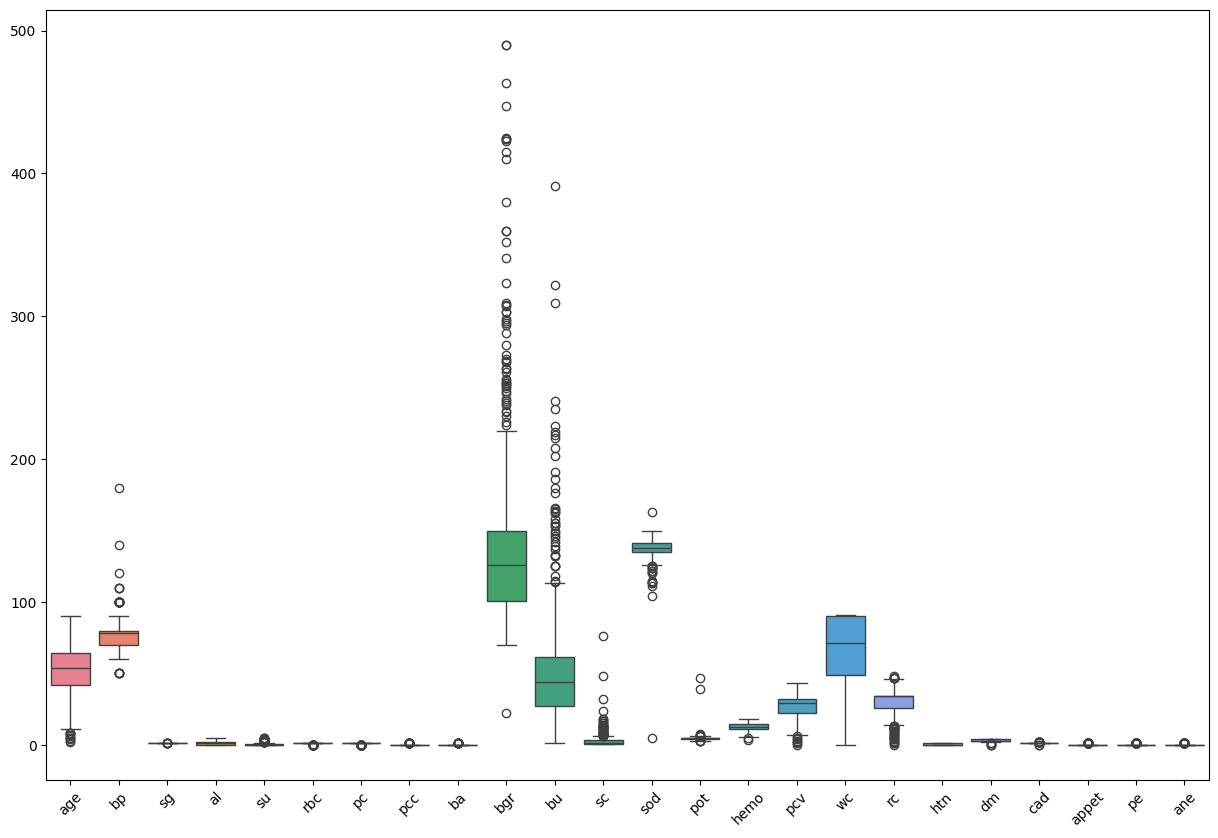

In [31]:


# Hedef değişken (classification) ve kategorik öznitelikleri dışarıda bırakalım.
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'classification' in numeric_cols:
    numeric_cols.remove('classification')


# --- 2. Her Bir Sayısal Öznitelik İçin Aykırı Değerleri Tespit Etme (IQR Yöntemi) ---
print("🔽 Aykırı değerler tespit ediliyor...")

outliers_dict = {} # Aykırı değerleri tutacak sözlük
total_outliers_count = 0

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri içeren indeksleri bul
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        outliers_dict[col] = {
            'count': len(outliers),
            'indices': outliers.index.tolist(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        total_outliers_count += len(outliers)
        print(f"  - '{col}' sütununda {len(outliers)} aykırı değer bulundu.")
        # İsteğe bağlı olarak aykırı değerleri gösterelim
        # print(f"    Örnek aykırı değerler:\n{outliers[[col]].head()}")
    else:
        print(f"  - '{col}' sütununda aykırı değer bulunamadı.")

print("\n✅ Aykırı değer tespiti tamamlandı.")

plt.figure(figsize=(15,10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.show()
